## Telkom Test Case Data Scientist

|name|email|
|---|---|
|WILDAN AULIA HIKMAWAN|wildan.a.hikmawan@gmail.com|

### Loading libraries and data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from math import ceil, floor

from sklearn import metrics
from IPython.display import clear_output

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report,roc_curve
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler

from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

import time 

sns.set(style = 'white')
seed=2022

C:\Users\wildan aulia h\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("telco_customer_churn.csv")

### Data Understanding

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

In [6]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# null observations of the TotalCharges column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Removing missing values 
df.dropna(inplace = True)

###  Data Visualization 

In [9]:
df.shape

(7032, 21)

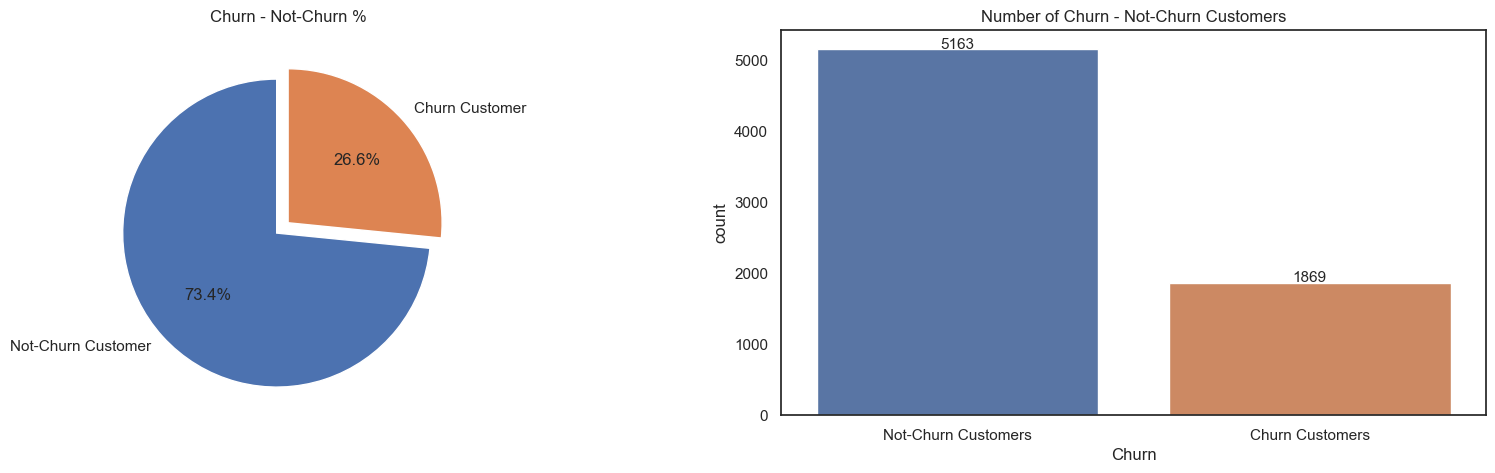

In [10]:
l = list(df['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0))
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot('Churn',data = df)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers');
plt.show()

The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!
Due to this, predictions will be biased towards Not-Churn customers.
Visualizations will also display this bias!

In [11]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(15, 7 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0)

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:.0f}%'.format(height), (p.get_x()+.35*width, p.get_y()+.4*height),
                        color = 'white',
                       weight = 'bold',
                       size = 12)

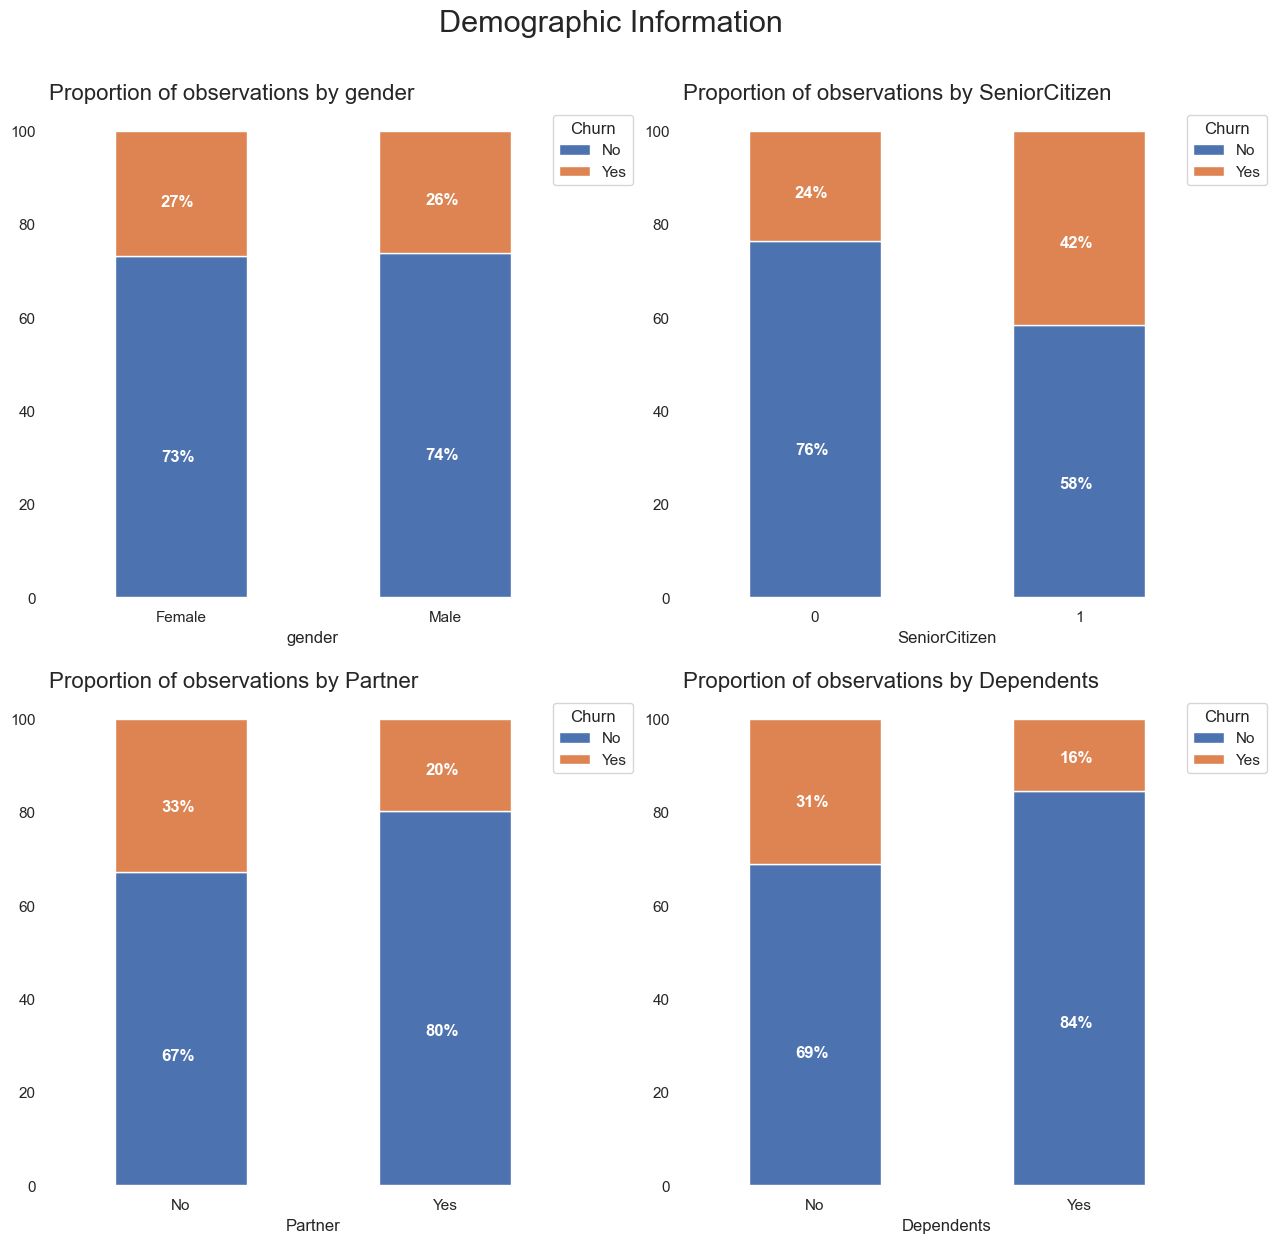

In [12]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

We can extract the following conclusions by analyzing demographic attributes:

The churn rate of senior citizens is almost double that of young citizens.<br>
We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.<br>
Customers with a partner churn less than customers with no partner.

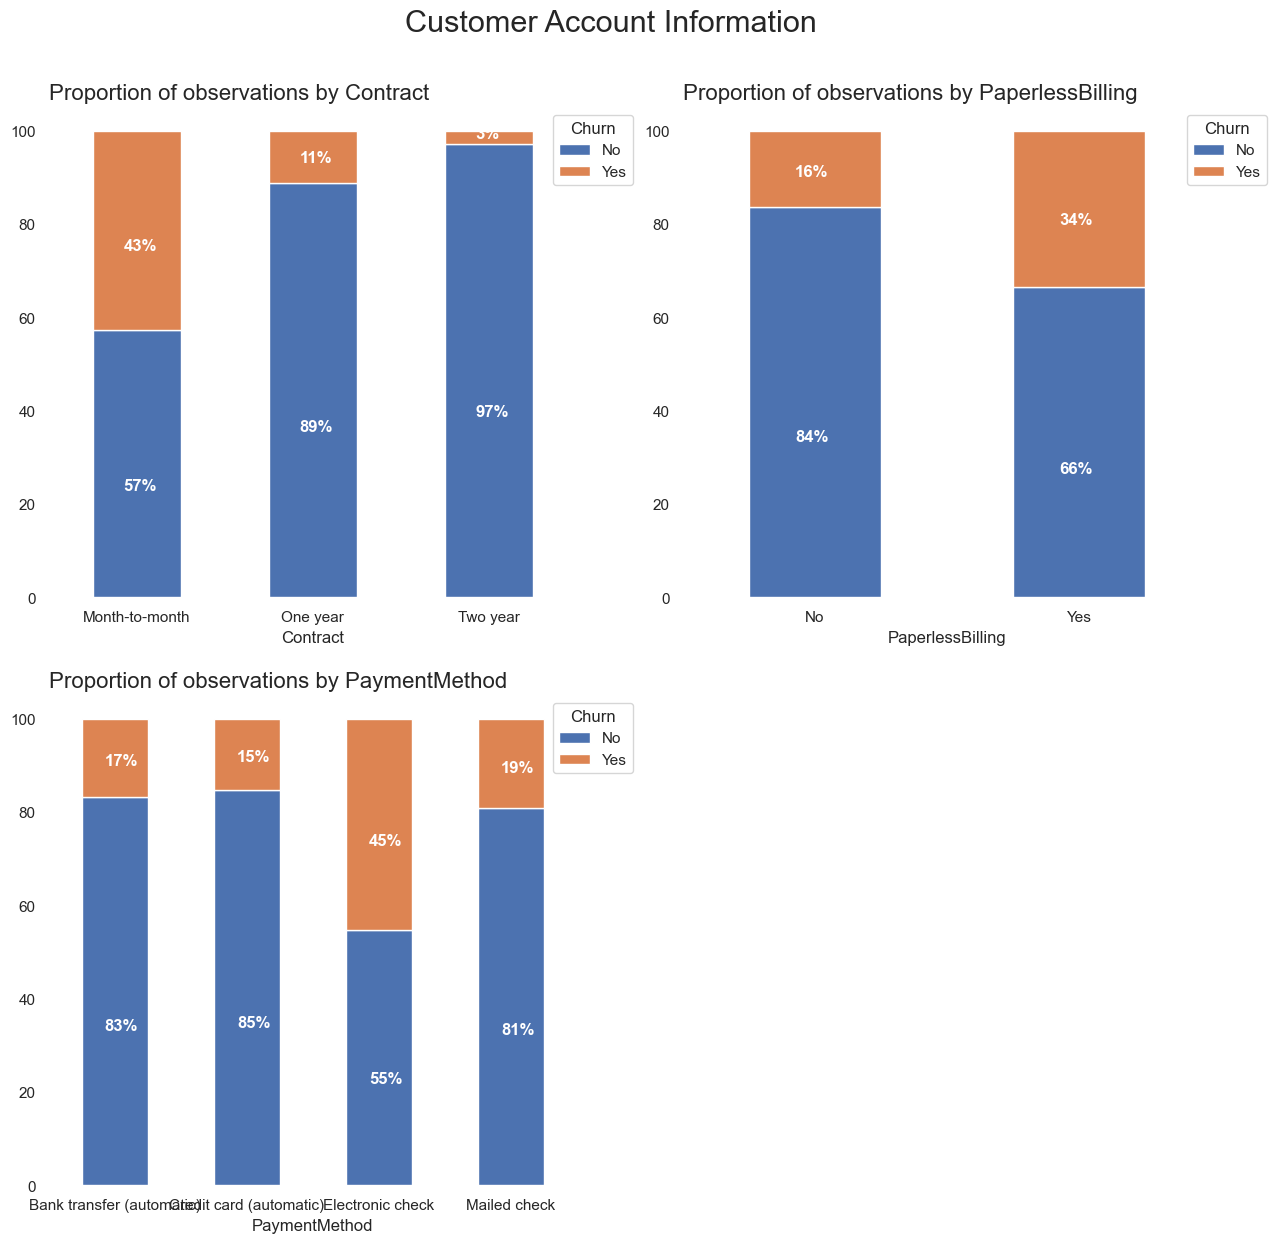

In [13]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

We can extract the following conclusions by analyzing customer account attributes:

Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.<br>
Customers who opted for an electronic check as paying method are more likely to leave the company.<br>
Customers subscribed to paperless billing churn more than those who are not subscribed.<br>

In [14]:
def histogram_plots(columns_to_plot, super_title):
    '''
     Prints a histogram for each independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None '''
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)


    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, label='Yes')

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)


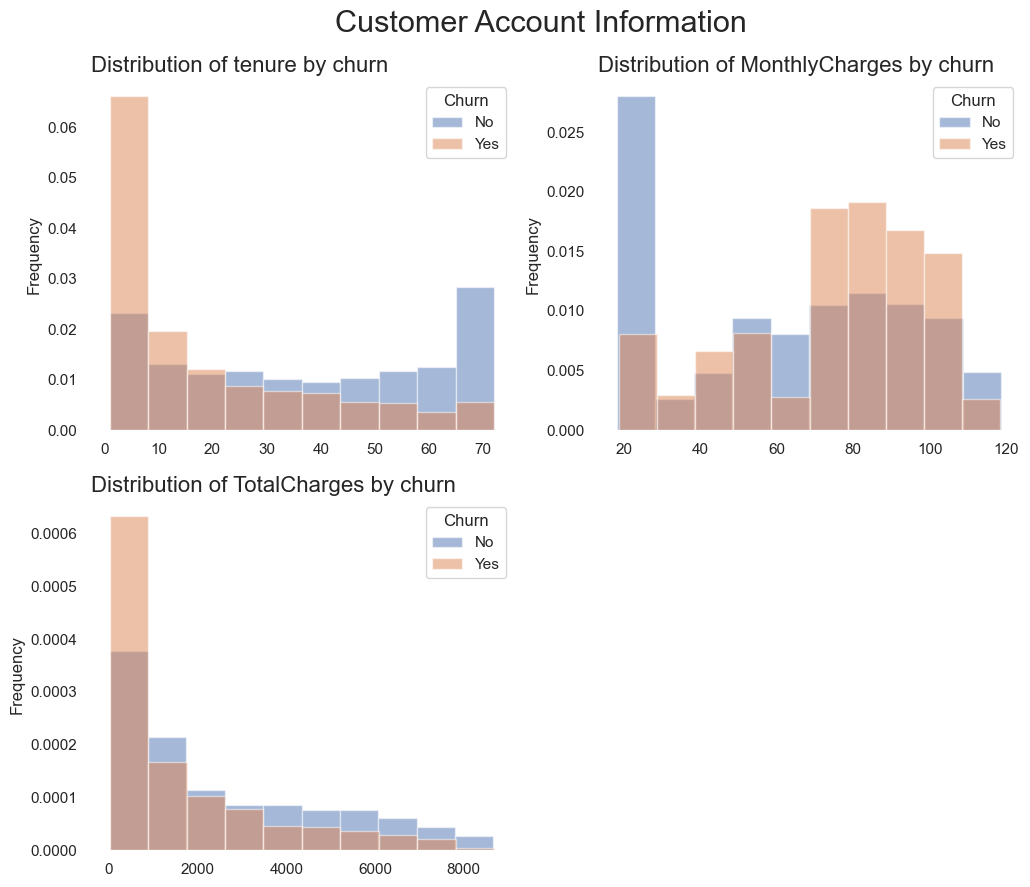

In [15]:
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Customer Account Information')

We can extract the following conclusions by analyzing the histograms above:

The churn rate tends to be larger when monthly charges are high.<br>
New customers (low tenure) are more likely to churn.<br>
Clients with high total charges are less likely to leave the company

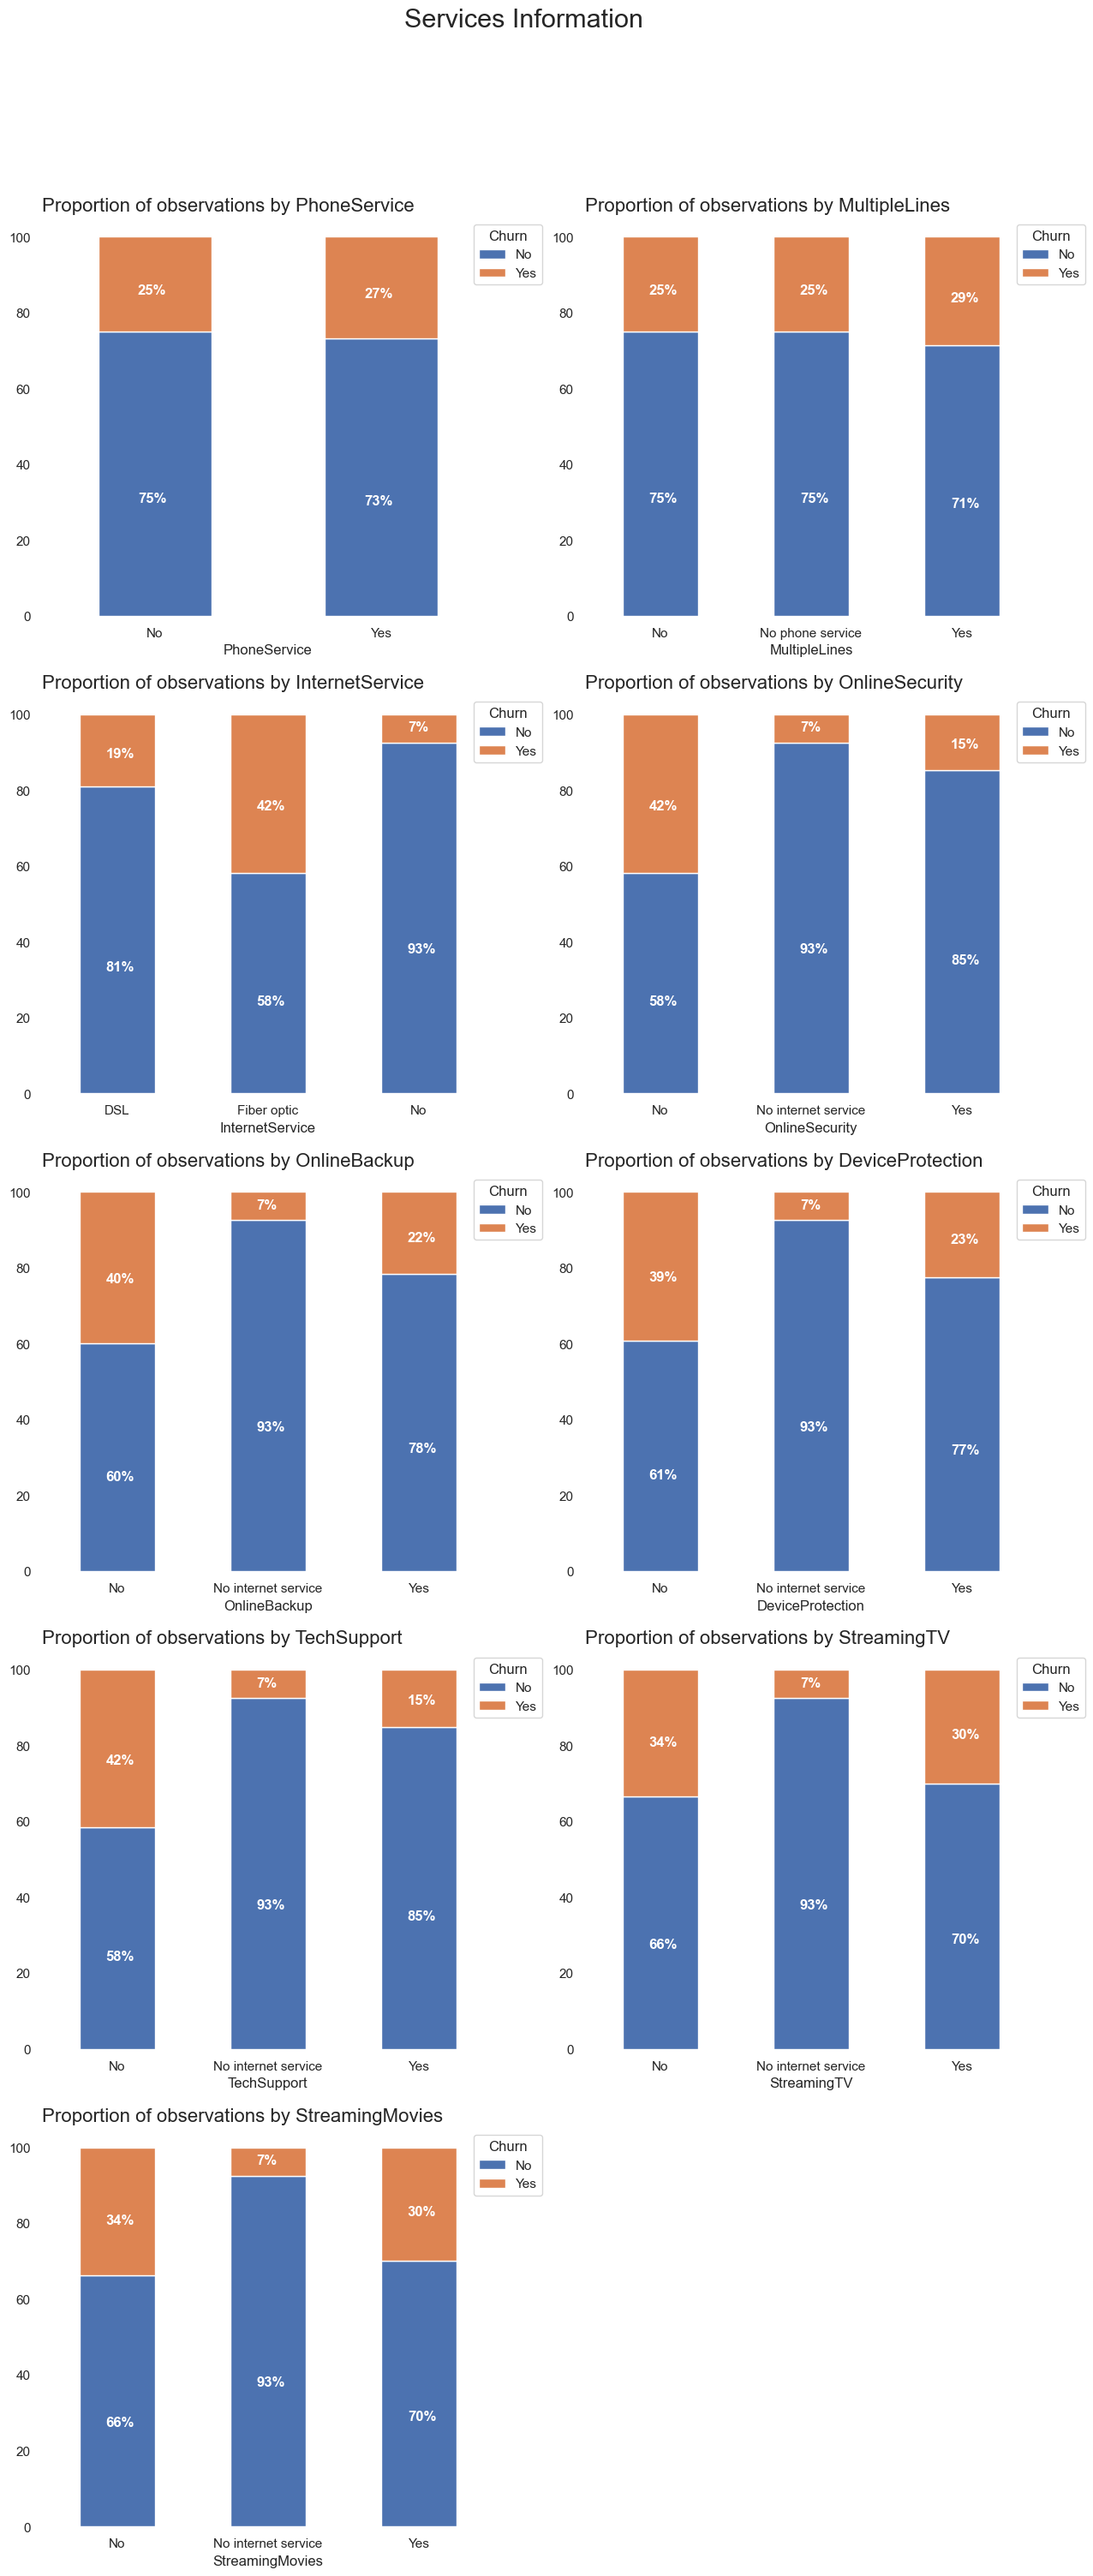

In [16]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

We can extract the following conclusions by evaluating services attributes:

We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.<br>
Clients with online security churn less than those without it.<br>
Customers with no tech support tend to churn more often than those with tech support.

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target. As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

### Data Preparation

In [17]:
#Remove customer IDs from the data set
df2 = df.drop(columns='customerID')
#Convertin the predictor variable in a binary numeric variable
# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df2[column] = df2[column].map({'Female': 1, 'Male': 0})
    else: 
        df2[column] = df2[column].map({'Yes': 1, 'No': 0}) 


In [18]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df2 = pd.get_dummies(df2, columns = one_hot_encoding_columns)


In [19]:
mms = MinMaxScaler() # Normalization

min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

df2[min_max_columns] = mms.fit_transform(df2[min_max_columns])

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

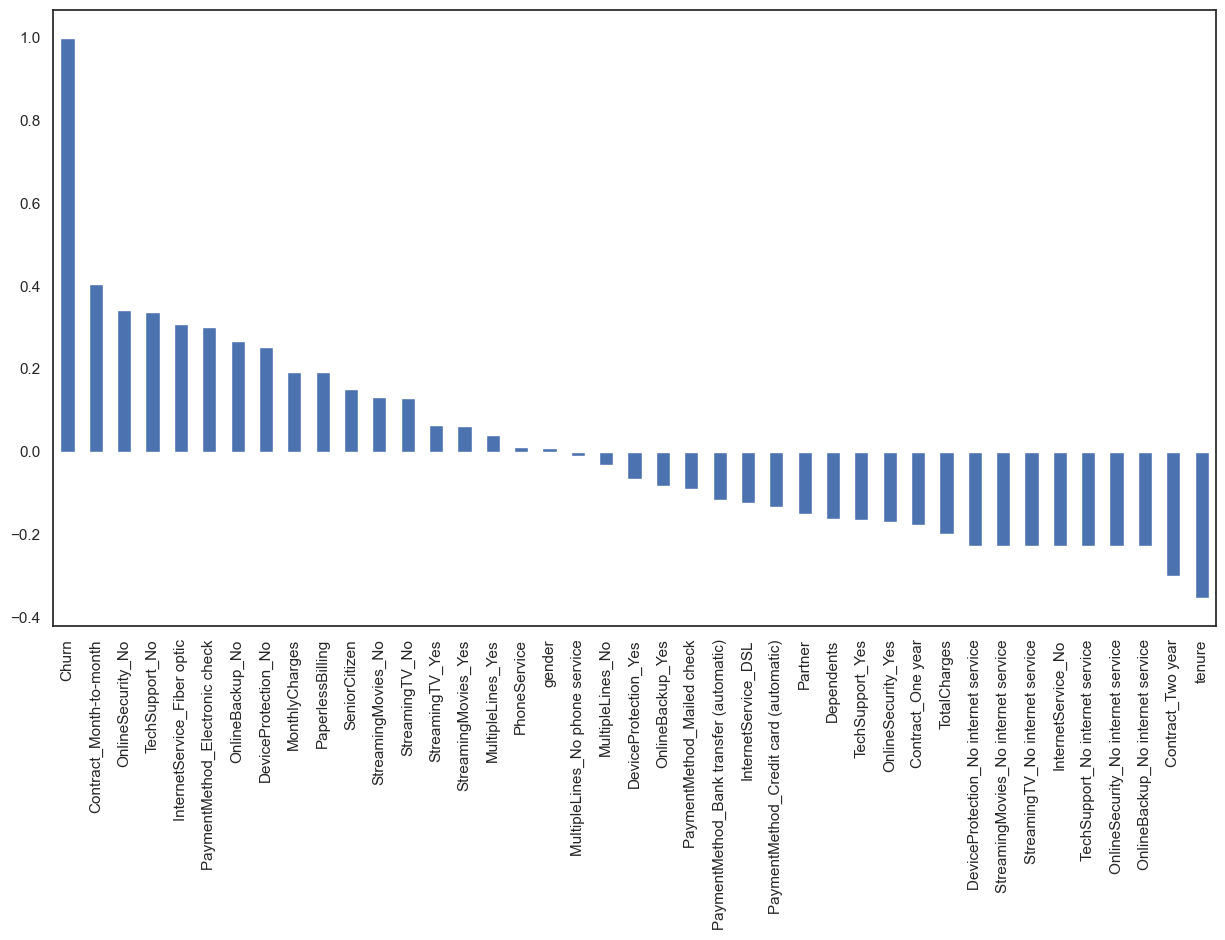

In [20]:
# Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [21]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return metrics.mutual_info_score(categorical_serie, df.Churn)

# select categorial variables excluding the response variable 

feature_importance = df.drop(['Churn','customerID'], axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = feature_importance.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

TotalCharges        0.537530
MonthlyCharges      0.173835
Contract            0.098182
tenure              0.078950
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
SeniorCitizen       0.010533
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


<AxesSubplot:>

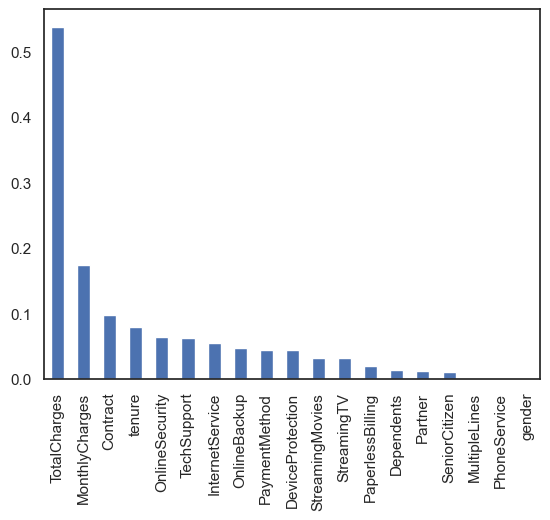

In [22]:
feature_importance.plot(kind='bar')

### modeling

In [23]:
# select independent variables
X = df2.drop(columns='Churn')

# select dependent variables
y = df2.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

In [24]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=seed, stratify=y)

print(y_train.value_counts())

0    4130
1    1495
Name: Churn, dtype: int64


In [25]:
#Initialize the classifier model
clf_1 = RandomForestClassifier(random_state=seed)
clf_2 = LogisticRegression(random_state=seed)
clf_3 = DecisionTreeClassifier(random_state=seed)
clf_4 = CatBoostClassifier(random_state=seed)
clf_5 = KNeighborsClassifier()
clf_6 = GradientBoostingClassifier(random_state=seed)
clf_7 = SVC(random_state=seed)
    

classifier_list = [clf_1,clf_2,clf_3,clf_4,clf_5,clf_6,clf_7]

In [26]:
#base model
ml_model = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for model in classifier_list:
    print(f"Processing {model.__class__.__name__}")
    
    start_time = time.time()
    # senn = SMOTEENN(random_state=seed)
    
    #Define pipeline
    # pipeline=Pipeline(steps=[("r", senn), ("m", model)])
    
    #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]
    
    scores = cross_validate(model, 
                            X_train, 
                            y_train, 
                            scoring = scoring, 
                            cv = cv, 
                            n_jobs = -1)
    
    ml_model.append(model.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))
    
# Hasil
clear_output()
df_model = pd.DataFrame({"ML_Model":ml_model,
                         "Accuracy": score_accuracy,
                         "Precision": score_precision,
                         "Recall": score_recall,
                         "AUC": score_auc,
                         "Training_Time": time_training})

df_model.sort_values(["AUC"],ascending=False).sort_values(["AUC"],ascending=False)

,ML_Model,Accuracy,Precision,Recall,AUC,Training_Time
5,GradientBoostingClassifier,0.800533,0.748154,0.711738,0.844763,00:00:02
1,LogisticRegression,0.801304,0.747702,0.718593,0.843638,00:00:00
3,CatBoostClassifier,0.792119,0.735227,0.702025,0.836997,00:00:43
0,RandomForestClassifier,0.782874,0.722022,0.685700,0.817096,00:00:07
6,SVC,0.794430,0.739766,0.699117,0.799402,00:00:07
4,KNeighborsClassifier,0.755674,0.685082,0.678415,0.768734,00:00:01
2,DecisionTreeClassifier,0.725985,0.651284,0.654072,0.655173,00:00:00


In [27]:
# Thresholding for Imbalanced Learning using ML Metrics

tl = TomekLinks(sampling_strategy="auto") #undersampling
rus = RandomUnderSampler(random_state=seed) #undersampling
enn = EditedNearestNeighbours() #undersampling
senn = SMOTEENN(random_state=seed) #combined
stl = SMOTETomek(random_state=seed) #combined
ros = RandomOverSampler(random_state=seed) #oversampling
sm = SMOTE(random_state=seed) #oversampling
ada = ADASYN(random_state=seed) #oversampling
bsm = BorderlineSMOTE(random_state=seed) #oversampling
SVMsm = SVMSMOTE(random_state=seed) #oversampling
 
list_all_imbalanced = [tl,rus,enn,senn,stl,ros,sm,ada,bsm,SVMsm]

imbalance_strategy = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for imbalanced_learning in list_all_imbalanced:
    print(f"Processing {imbalanced_learning.__class__.__name__}")
    start_time = time.time()
    model = GradientBoostingClassifier(random_state = seed)
    # Define pipeline
    pipeline=Pipeline(steps=[("r", imbalanced_learning), ("m", model)])
    
    # Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=seed)
    
    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]
    scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    
    imbalance_strategy.append(imbalanced_learning.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))
    
# Hasil
clear_output()
df_evaluation = pd.DataFrame({"Imbalance_Strategy":imbalance_strategy,
                              "Accuracy": score_accuracy,
                              "Precision": score_precision,
                              "Recall": score_recall,
                              "AUC": score_auc,
                              "Training_Time": time_training})
df_evaluation.sort_values(["AUC"],ascending=False)


,Imbalance_Strategy,Accuracy,Precision,Recall,AUC,Training_Time
0,TomekLinks,0.796148,0.738903,0.737203,0.845038,00:00:03
5,RandomOverSampler,0.757926,0.717515,0.765373,0.844687,00:00:03
9,SVMSMOTE,0.764563,0.720198,0.764629,0.843380,00:00:08
2,EditedNearestNeighbours,0.737600,0.710818,0.765401,0.843120,00:00:01
1,RandomUnderSampler,0.747319,0.712379,0.763342,0.842101,00:00:01
6,SMOTE,0.770607,0.720891,0.758290,0.841275,00:00:03
4,SMOTETomek,0.769481,0.720564,0.759159,0.840495,00:00:04
7,ADASYN,0.759289,0.713926,0.756415,0.838816,00:00:03
8,BorderlineSMOTE,0.753304,0.712946,0.759949,0.837557,00:00:03
3,SMOTEENN,0.724089,0.704155,0.759116,0.835796,00:00:03


In [28]:
#model with resampling
ml_model = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for model in classifier_list:
    print(f"Processing {model.__class__.__name__}")
    
    start_time = time.time()
    SVMsm = SVMSMOTE(random_state=seed)
    
    #Define pipeline
    pipeline=Pipeline(steps=[("r", SVMsm), ("m", model)])
    
    #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]
    
    scores = cross_validate(pipeline, 
                            X_train, 
                            y_train, 
                            scoring = scoring, 
                            cv = cv, 
                            n_jobs = -1)
    
    ml_model.append(model.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))
    
# Hasil
clear_output()
df_model = pd.DataFrame({"ML_Model":ml_model,
                         "Accuracy": score_accuracy,
                         "Precision": score_precision,
                         "Recall": score_recall,
                         "AUC": score_auc,
                         "Training_Time": time_training})

df_model.sort_values(["AUC"],ascending=False).sort_values(["AUC"],ascending=False)

,ML_Model,Accuracy,Precision,Recall,AUC,Training_Time
5,GradientBoostingClassifier,0.762193,0.717653,0.761664,0.841977,00:00:07
1,LogisticRegression,0.773689,0.723812,0.761029,0.841057,00:00:05
3,CatBoostClassifier,0.773807,0.718770,0.745959,0.832307,00:00:38
6,SVC,0.768296,0.715816,0.748608,0.817561,00:00:17
0,RandomForestClassifier,0.768000,0.707344,0.722515,0.815423,00:00:07
4,KNeighborsClassifier,0.715793,0.668882,0.703393,0.762598,00:00:05
2,DecisionTreeClassifier,0.716919,0.649805,0.664328,0.665359,00:00:05


In [29]:
gb = GradientBoostingClassifier(random_state=seed)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=2022)

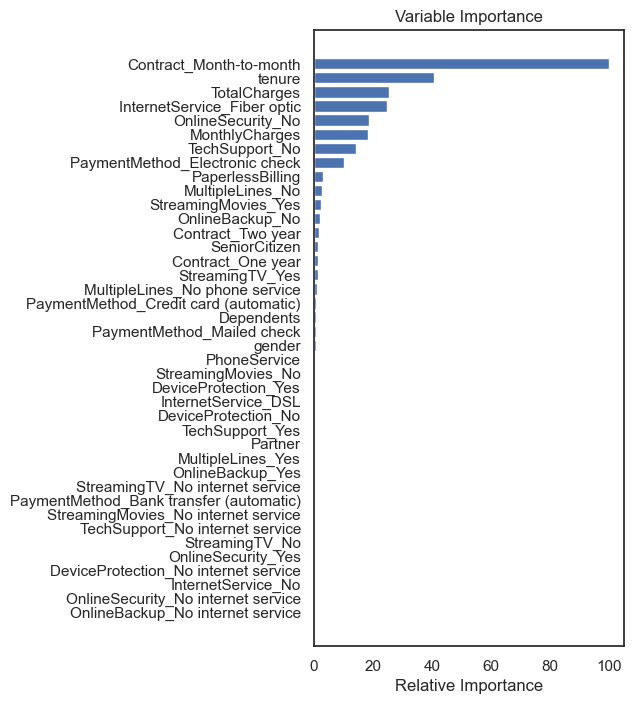

In [30]:
# Plot feature importance https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(4, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [31]:
feature_importance[sorted_idx]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.98291644e-02,
       8.26723418e-02, 8.63243178e-02, 8.76136846e-02, 1.85248825e-01,
       2.62584637e-01, 3.70649641e-01, 4.05848189e-01, 5.25711558e-01,
       6.64903874e-01, 7.29448785e-01, 7.91711918e-01, 9.20780954e-01,
       1.25559353e+00, 1.26891420e+00, 1.38776208e+00, 1.61349240e+00,
       2.17738259e+00, 2.43824275e+00, 2.84611530e+00, 3.04191088e+00,
       1.02547177e+01, 1.43531121e+01, 1.82316009e+01, 1.86187605e+01,
       2.46379309e+01, 2.53854627e+01, 4.05835459e+01, 1.00000000e+02])